# DATA ACQUISITION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("../input/hotel-booking-demand/hotel_bookings.csv")

In [3]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

**Data types:**
* Categorical - hotel, is_canceled, customer_type, is_repeated_guest, meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, agent, company, reservation_status,
* Numerical - lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, previous_cancellations, booking_changes, previous_bookings_not_canceled, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests	
* Ordinal - arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month,  reservation_status_date

**Mising values:**
1. country
2. agent
3. company

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000



* The following columns previous_cancellations, previous_bookings_not_canceled, booking_changes days_in_waiting_list, required_car_parking_spaces, total_of_special_requests have only a maximum value. This shows that these features contribute to the decision of cancellation only in very few cases.

**Assumptions about impact of features:**
* High:
hotel, lead_time, arrival_date_year, arrival_date_month, stays_in_weekend_nights, stays_in_week_nights, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, deposit_type, days_in_waiting_list, customer_type

* Medium:
children, babies, distribution_channel, booking_changes, adr

* Low:
arrival_date_week_number, arrival_date_day_of_month,country, meal, adults, market_segment, agent, company, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date

**Assumptions about cancellation:**
1. The type of hotel decides the cancelation rate with higher cancellations in city hotels as compared to resort hotels due to variety of facilities available in resort hotels.
2. The earlier the booking made, higher the chances of cancellation.
3. Customers who have bookings for longer durations have lesser chance of cancelling their booking. 
4. As more children or babies are involved in the booking, higher chances of cancellation.
5. Old guest (is_repeated_guest=1) is less likely to cancel current booking.
6. If there are high previous cancellations, possibility of cancellation of current booking is also high.
7. If room assigned is not the same as reserved room type, customer might positively cancel the booking.
8. Higher the number of changes made to the booking, lesser is the chance of cancellation due to the investment of time in curating the booking as per one's requirement.
9. Bookings that are refundable or for which deposits were not made at the time of booking stand a high chance of cancelation.
10. If the number of days in waiting list is significant, customer might make some other booking due to uncertainty of confirmation of current booking.

**Target variable:**
is_canceled

# EXPLORATORY DATA ANALYSIS

***UNIVARIATE ANALYSIS (Checking the validity of assumptions)***

In [6]:
is_can = len(df[df['is_canceled']==1])
print("Percentage cancelation= ", is_can/len(df))
df['reservation_status'].value_counts(normalize=True)*100

Percentage cancelation=  0.37041628277075134


Check-Out    62.958372
Canceled     36.030656
No-Show       1.010972
Name: reservation_status, dtype: float64

In [7]:
corr= df.corr(method='pearson')['is_canceled'][:]
corr

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.083114
company                          -0.020642
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

* highest positive correlations : lead_time followed by previous_cancellations
* highest negative correlations : total_of_special_requests, required_car_parking_spaces

Cancelations in resort hotel=  0.27763354967548676
Cancelations in city hotel=  0.41726963317786464


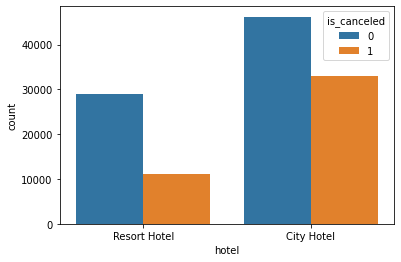

In [8]:
sns.countplot(data=df, x='hotel', hue='is_canceled')
resort_canceled = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==1)]
city_canceled = df[(df['hotel']=='City Hotel') & (df['is_canceled']==1)]
print('Cancelations in resort hotel= ', (len(resort_canceled))/(len(df[df['hotel']=='Resort Hotel'])))
print('Cancelations in city hotel= ', (len(city_canceled))/(len(df[df['hotel']=='City Hotel'])))

Our 1st assumption, city hotels have higher cancelation rate than resort hotels, is valid.

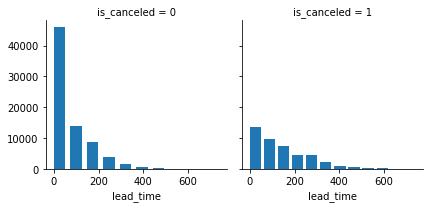

In [9]:
grid = sns.FacetGrid(df, col='is_canceled')
grid.map(plt.hist, 'lead_time', width=50)
grid.add_legend()

Maximum cancelations occur if the booking is made 60-70 days before the checkin date. Longer the lead_time, lower is the cancelation. This invalidates our 2nd assumption. 

In [10]:
print(len(df[(df['stays_in_weekend_nights']==0) & (df['stays_in_week_nights']==0)])) 

715


715 bookings don't have both weekday or weekend nights which could be ar error in the data as this is not possible in real life scenario. Therefore these rows can be eliminated from the dataset.

In [11]:
((len(df.loc[(df['children']!=0) | (df['babies']!=0)]))/(len(df))) * 100

7.819750397855767

The number of customers having children or babies or both are only 8% of the total population. Therefore this information can be ignored as it will not play a significatn role in deciding whether to cancel the booking or not. Assumption 4 can be discarded.

Cancelations among new guests=  0.3778508392455442
Cancelations among old guests=  0.14488188976377953


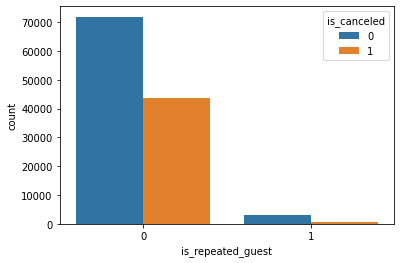

In [12]:
sns.countplot(data=df, x='is_repeated_guest', hue='is_canceled')
new_guest = df[(df['is_repeated_guest']==0) & (df['is_canceled']==1)]
old_guest = df[(df['is_repeated_guest']==1) & (df['is_canceled']==1)]
print('Cancelations among new guests= ', (len(new_guest))/(len(df[df['is_repeated_guest']==0])))
print('Cancelations among old guests= ', (len(old_guest))/(len(df[df['is_repeated_guest']==1])))

As seen in the correlation table, the above graph bolsters the evidence that maximum customers are new comers and they are less likely to cancel their current booking.
Old guests are less likely to cancel the booking (14%). Assumption 5 holds true.

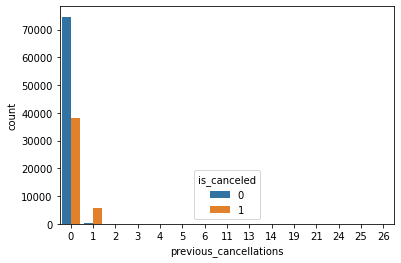

In [13]:
sns.countplot(data=df, x='previous_cancellations', hue='is_canceled')

Maximum customers have 0 previous cancellations. They are less likely to cancel the current booking. However, customers who have cancelled once earlier are more likely to cancel the current booking. This also matches with the positive correlation between previous_cancellations and is_cancelled and supports Assumption 6.

In [14]:
temp = df.loc[df['reserved_room_type']!=df['assigned_room_type']]
temp['is_canceled'].value_counts(normalize=True)*100

0    94.623584
1     5.376416
Name: is_canceled, dtype: float64

Assumption 7 that there more cancellations when assigned room type is different from reserved room type is not valid. There are only 5% cancellations in such a case.

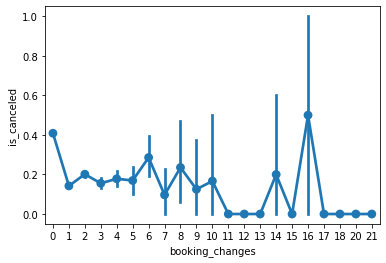

In [15]:
sns.pointplot(data=df, x='booking_changes', y='is_canceled')

Assumption 8 about the bookings does not hold as there is no trend in it's impact on the cancellation of bookings.

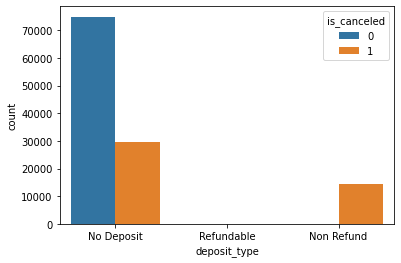

In [16]:
sns.countplot(x="deposit_type", hue="is_canceled",data=df);

Contrary to assumption 9, bookings that are non_refundable are canceled.

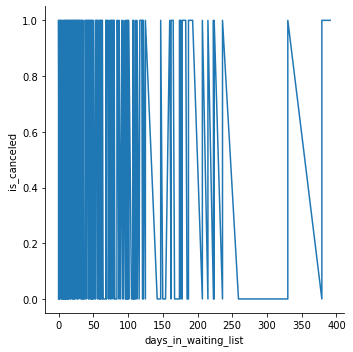

In [17]:
sns.relplot(data=df, x='days_in_waiting_list', y='is_canceled', kind='line', estimator=None)

No relation can be established between days_in_waiting_list and is_canceled. Therefore, we will take this feature for further analysis. Assumption 10 can be discarded.

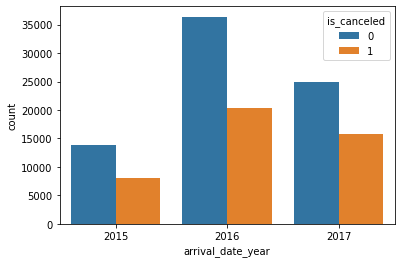

In [18]:
sns.countplot(data=df, x='arrival_date_year', hue='is_canceled')

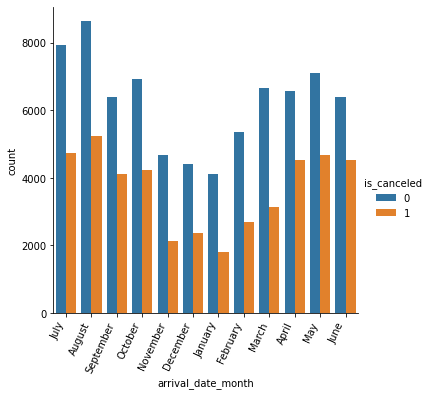

In [19]:
chart = sns.catplot(data=df, x='arrival_date_month', hue='is_canceled', kind='count')
chart.set_xticklabels(rotation=65, horizontalalignment='right')

Maximum bookings occur in 2016 in the months of July and August.

In [20]:
year_count = df.groupby(['arrival_date_year', 'is_canceled']).size().to_frame(name='count')
year_perct = year_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(year_perct)

month_count = df.groupby(['arrival_date_month', 'is_canceled']).size().to_frame(name='count')
month_perct = month_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(month_perct)

                                   count
arrival_date_year is_canceled           
2015              0            62.984179
                  1            37.015821
2016              0            64.136703
                  1            35.863297
2017              0            61.302136
                  1            38.697864
                                    count
arrival_date_month is_canceled           
April              0            59.202814
                   1            40.797186
August             0            62.246883
                   1            37.753117
December           0            65.029499
                   1            34.970501
February           0            66.584036
                   1            33.415964
January            0            69.522685
                   1            30.477315
July               0            62.546402
                   1            37.453598
June               0            58.542828
                   1            41.457172


Percentage of cancellations was higher in 2015 and 2017 despite higher number of bookings in 2016. April and June had the largest cancellations overall.

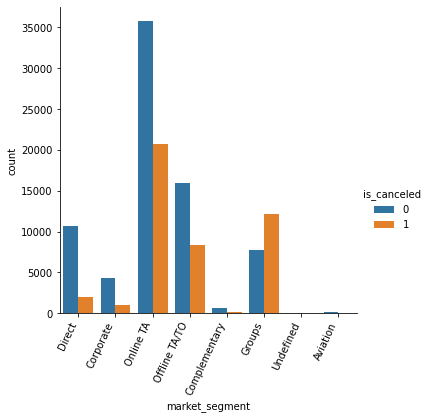

In [21]:
chart = sns.catplot(data=df, x='market_segment', kind='count', hue='is_canceled')
chart.set_xticklabels(rotation=65, horizontalalignment='right')

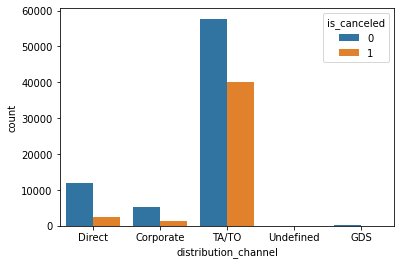

In [22]:
sns.countplot(data=df, x='distribution_channel', hue='is_canceled')

Transient          75.059050
Transient-Party    21.043638
Contract            3.414021
Group               0.483290
Name: customer_type, dtype: float64


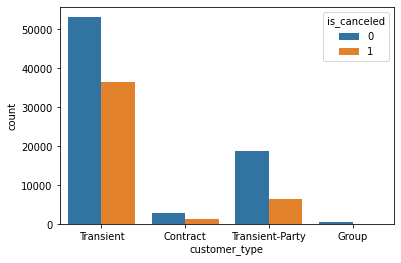

In [23]:
print(df['customer_type'].value_counts(normalize=True)*100)
sns.countplot(data=df, x='customer_type', hue='is_canceled')

75% bookings occur in Transient category of customers. It also sees the highest cancellation among all the categories.

In [24]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

***MULTIVARIATE ANALYSIS***

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


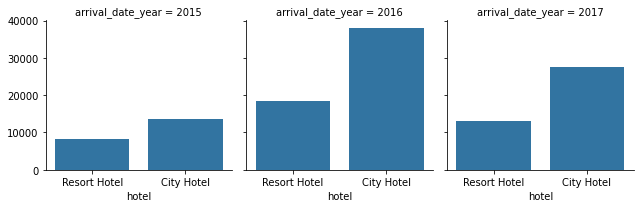

In [25]:
grid = sns.FacetGrid(df, col='arrival_date_year')
grid.map(sns.countplot, 'hotel')

In all three years city hotels saw more bookings than resort hotels.

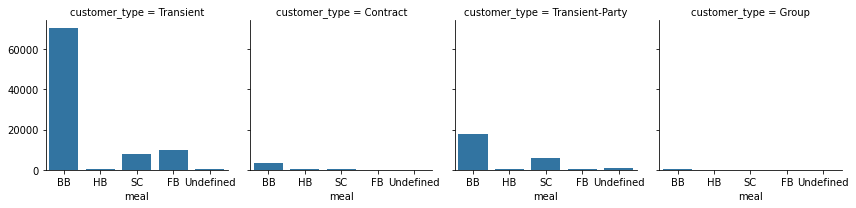

In [26]:
df['meal'].nunique(), df['customer_type'].nunique()
grid = sns.FacetGrid(df, col='customer_type')
grid.map(sns.countplot, 'meal')

All kinds of customers prefer BB type meals majorly.

In [27]:
df.pivot_table(columns='hotel', values='country', aggfunc=lambda x:x.mode())

hotel,City Hotel,Resort Hotel
country,PRT,PRT


People from country with ISO code 'PRT' made the most number of bookings in both types of hotels.

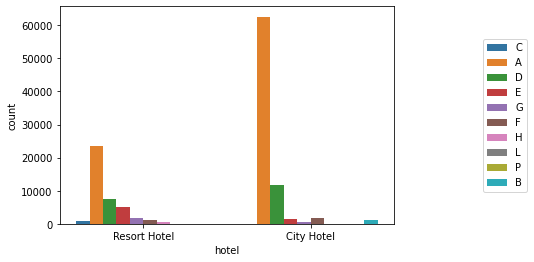

In [28]:
g = sns.countplot(data=df, x='hotel', hue='reserved_room_type')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

* Resort hotels room preference : A, D, E
*  City hotels room preference : A, D, F

In [29]:
print("TABLE 1")
print(df.groupby(['hotel', 'customer_type']).size())

TABLE 1
hotel         customer_type  
City Hotel    Contract            2300
              Group                293
              Transient          59404
              Transient-Party    17333
Resort Hotel  Contract            1776
              Group                284
              Transient          30209
              Transient-Party     7791
dtype: int64


For each kind of hotel, Transient type of customers are the highest followed by Transient Party. Group bookings are the least.

In [30]:
print(df.groupby(['customer_type', 'deposit_type']).size())

customer_type    deposit_type
Contract         No Deposit       3530
                 Non Refund        544
                 Refundable          2
Group            No Deposit        569
                 Refundable          8
Transient        No Deposit      76684
                 Non Refund      12909
                 Refundable         20
Transient-Party  No Deposit      23858
                 Non Refund       1134
                 Refundable        132
dtype: int64


Each category of customers book hotels without deposit. Surprisingly, between refundable and non-refundable type, higher number of people book hotels that are non-refundable.

In [31]:
print(df.groupby(['customer_type', 'distribution_channel']).size())
print("-"*60)
print(df.groupby(['customer_type', 'market_segment']).size())

customer_type    distribution_channel
Contract         Corporate                  27
                 Direct                     19
                 TA/TO                    4030
Group            Corporate                  31
                 Direct                    116
                 TA/TO                     430
Transient        Corporate                4157
                 Direct                  12343
                 GDS                       193
                 TA/TO                   72919
                 Undefined                   1
Transient-Party  Corporate                2462
                 Direct                   2167
                 TA/TO                   20491
                 Undefined                   4
dtype: int64
------------------------------------------------------------
customer_type    market_segment
Contract         Complementary         2
                 Corporate            22
                 Direct               14
                 Groups     

In [32]:
print(df.groupby(['hotel', 'distribution_channel']).size())
print("-"*40)
print(df.groupby(['hotel', 'market_segment']).size())

hotel         distribution_channel
City Hotel    Corporate                3408
              Direct                   6780
              GDS                       193
              TA/TO                   68945
              Undefined                   4
Resort Hotel  Corporate                3269
              Direct                   7865
              TA/TO                   28925
              Undefined                   1
dtype: int64
----------------------------------------
hotel         market_segment
City Hotel    Aviation            237
              Complementary       542
              Corporate          2986
              Direct             6093
              Groups            13975
              Offline TA/TO     16747
              Online TA         38748
              Undefined             2
Resort Hotel  Complementary       201
              Corporate          2309
              Direct             6513
              Groups             5836
              Offline TA/TO   

Combining table 1 and above table, we see the relation between freqeunt customer types at each hotel and their mode of booking. This information can be used by the hotel to focus on customised publicity stratgies. Similarly, the market segments can be analysed for a more customer centric approach. Hotel type with distribution channel and market segment can also be analysed. 

In [33]:
group = df.groupby(['customer_type', 'reservation_status']).size()
group_pcts = group.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
group_pcts

customer_type    reservation_status
Contract         Canceled              30.323847
                 Check-Out             69.038273
                 No-Show                0.637880
Group            Canceled               9.532062
                 Check-Out             89.774697
                 No-Show                0.693241
Transient        Canceled              39.678395
                 Check-Out             59.253680
                 No-Show                1.067925
Transient-Party  Canceled              24.554211
                 Check-Out             74.570132
                 No-Show                0.875657
dtype: float64

In [34]:
df.pivot_table(columns='hotel', values=['stays_in_weekend_nights', 'stays_in_week_nights'], aggfunc=lambda x:x.sum())

hotel,City Hotel,Resort Hotel
stays_in_week_nights,173174,125337
stays_in_weekend_nights,63082,47664


In [35]:
df.pivot_table(columns='hotel', values='total_of_special_requests', aggfunc=lambda x:x.sum())

hotel,City Hotel,Resort Hotel
total_of_special_requests,43387,24828


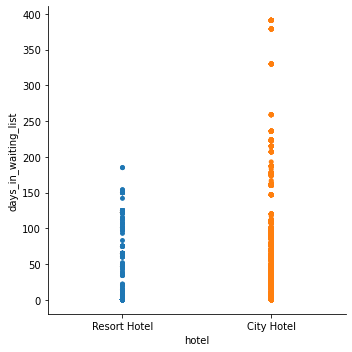

In [36]:
sns.catplot(data=df, x='hotel', y='days_in_waiting_list', jitter=False)

As it is seen, city hotels have much larger waiting time in days compared to resort hotels which may signify that their demad is higher.

In [37]:
df['country'].value_counts(normalize=True)*100

PRT    40.865587
GBR    10.200838
FRA     8.759314
ESP     7.205934
DEU     6.128576
         ...    
NCL     0.000841
CYM     0.000841
VGB     0.000841
SMR     0.000841
UMI     0.000841
Name: country, Length: 177, dtype: float64

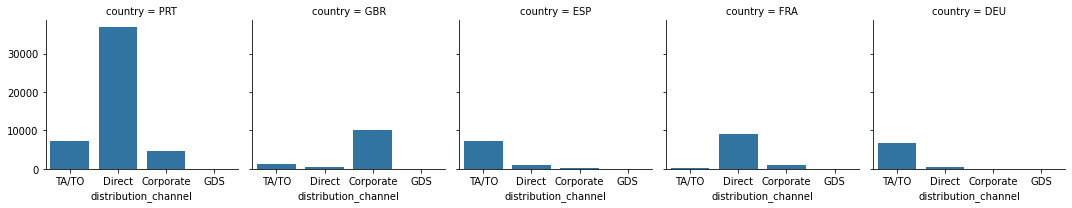

In [38]:
temp = df.loc[(df['country']=='PRT') | (df['country']=='GBR') | (df['country']=='FRA') | (df['country']=='ESP') | (df['country']=='DEU')]
grid = sns.FacetGrid(temp, col='country')
grid.map(sns.countplot, 'distribution_channel')

Using this information hotels can implement models of publicity for getting more bookings in the top 5 countries from where most of their customers hail.

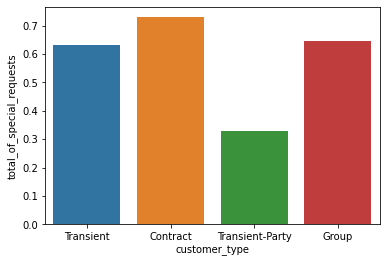

In [39]:
sns.barplot(data=df, x='customer_type', y='total_of_special_requests', ci=None)

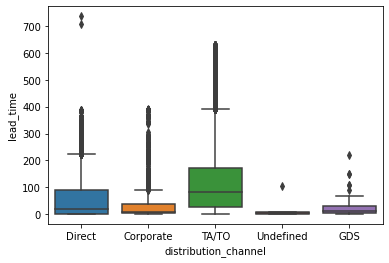

In [40]:
sns.boxplot(data=df, x='distribution_channel', y='lead_time')

# FEATURE ENGINEERING

In [41]:
month_map = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}
df.arrival_date_month = df.arrival_date_month.map(month_map).astype(int)

In [42]:
df['arrival_date'] = df['arrival_date_year'].astype(str)+'-'+df['arrival_date_month'].astype(str)+'-'+df['arrival_date_day_of_month'].astype(str)

In [43]:
def roomChange(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return False
    else:
        return True

df['change_in_room'] = df.apply(roomChange, axis=1)

In [44]:
df['children'] = df['children'].fillna(0)
df['offspring'] = (df['children'] + df['babies']).astype(int)

In [45]:
df['total_bookings'] = df['previous_cancellations'] + df['previous_bookings_not_canceled']

In [46]:
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['agent'].fillna(df['agent'].mode()[0], inplace=True)
df['company'].fillna(df['company'].mode()[0], inplace=True)

In [47]:
for i in range(len(df)):
    if df.loc[i, 'country'] == 'PRT':
        df.at[i, 'country'] = 1
    elif df.loc[i, 'country'] == 'GBR':
        df.at[i, 'country'] = 2
    else:
        df.at[i, 'country'] = 0

In [48]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [49]:
df['stay_duration'] = df['reservation_status_date'] - df['arrival_date']
df['stay_duration'] = df['stay_duration'] / np.timedelta64(1, 'D')
df['stay_duration'] = df['stay_duration'].astype(int)

In [50]:
for i in range(len(df)):
    if df.loc[i, 'stay_duration']<0:
        df.at[i, 'stay_duration'] = -1

In [51]:
lb = LabelEncoder()
var = ['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country']
for item in var:
    df[item] = lb.fit_transform(df[item])
df = pd.get_dummies(df, columns=['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country'])

In [52]:
df.drop(['meal', 'assigned_room_type', 'reserved_room_type', 'reservation_status', 'reservation_status_date', 'arrival_date'], axis=1, inplace=True)

# MODEL AND RESULT

In [53]:
train_var = df.drop(['is_canceled'], axis=1)
test_var = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(train_var, test_var, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((95512, 50), (95512,), (23878, 50), (23878,))

In [54]:
#Data scaling
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

In [55]:
#Logistic Regression
logreg = LogisticRegression(max_iter=500).fit(X_train_mm, y_train)
scores = cross_val_score(logreg, X_train_mm, y_train, cv=5)
logreg_pred = logreg.predict(X_test_mm)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, logreg_pred)))
print(confusion_matrix(y_test, logreg_pred))

Average cross validation score: 0.990
Test accuracy: 0.990
F1 score: 0.986
[[15027    23]
 [  221  8607]]


In [56]:
#Linear SVC
svc = LinearSVC().fit(X_train_mm, y_train)
scores = cross_val_score(svc, X_train_mm, y_train, cv=5)
svc_pred = svc.predict(X_test_mm)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(svc.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, svc_pred)))
print(confusion_matrix(y_test, svc_pred))

Average cross validation score: 0.995
Test accuracy: 0.995
F1 score: 0.993
[[15043     7]
 [  123  8705]]


In [57]:
#SGD Classifier
sgd = SGDClassifier(alpha=0.1).fit(X_train_std, y_train)
scores = cross_val_score(sgd, X_train_std, y_train, cv=5)
sgd_pred = sgd.predict(X_test_std)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(sgd.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, sgd_pred)))
print(confusion_matrix(y_test, sgd_pred))

Average cross validation score: 0.988
Test accuracy: 0.987
F1 score: 0.982
[[15041     9]
 [  304  8524]]


In [58]:
#Ridge Classifier
rc = RidgeClassifier(alpha=1, normalize=True)
rc.fit(X_train, y_train)
scores = cross_val_score(rc, X_train, y_train, cv=5)
rc_pred = rc.predict(X_test)
print("Normalized data:")
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(rc.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, rc_pred)))
print(confusion_matrix(y_test, rc_pred))

rc = RidgeClassifier(alpha=1)
rc.fit(X_train_std, y_train)
scores = cross_val_score(rc, X_train_std, y_train, cv=5)
rc_pred = rc.predict(X_test_std)
print("Standard scaled data:")
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(rc.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, rc_pred)))
print(confusion_matrix(y_test, rc_pred))

Normalized data:
Average cross validation score: 0.919
Test accuracy: 0.917
F1 score: 0.874
[[15037    13]
 [ 1965  6863]]
Standard scaled data:
Average cross validation score: 0.986
Test accuracy: 0.986
F1 score: 0.980
[[15044     6]
 [  337  8491]]


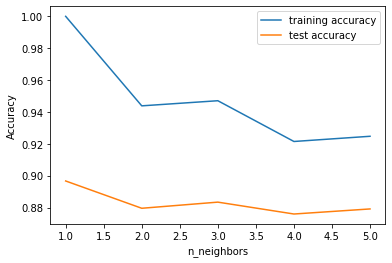

In [59]:
#KNN
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 6)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [60]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
scores = cross_val_score(knn, X_train, y_train, cv=5)
knn_pred = knn.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(knn.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, knn_pred)))
print(confusion_matrix(y_test, knn_pred))

Average cross validation score: 0.876
Test accuracy: 0.883
F1 score: 0.838
[[13919  1131]
 [ 1653  7175]]


In [61]:
#Decision Tree
tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=5)
tree_pred = tree.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(confusion_matrix(y_test, tree_pred))

Average cross validation score: 0.994
Test accuracy: 0.994
F1 score: 0.992
[[14903   147]
 [    0  8828]]


In [62]:
def classifier(train, test, estimator, param_grid):
    grid_search = GridSearchCV(estimator, param_grid, cv=5)
    grid_search.fit(train, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    print("Test score: {:.3f}".format(grid_search.score(test, y_test)))

def feature_selection(model):
    select_features = SelectFromModel(estimator=model, threshold='median')
    select_features.fit(X_train, y_train)
    X_train_select = select_features.transform(X_train)
    X_test_select = select_features.transform(X_test)
    return X_train_select, X_test_select

def run_model(model, model_feature, param_grid):
    print("Before feature selection:")
    classifier(X_train, X_test, model, param_grid)
    X_train_select, X_test_select = feature_selection(model_feature)
    print("After feature selection")
    classifier(X_train_select, X_test_select, model, param_grid)

In [63]:
#Random Forest
param_grid = {'n_estimators':[50,75,100], 'max_depth':[1,2,5]}
run_model(RandomForestClassifier(), RandomForestClassifier(n_estimators=50, max_depth=2), param_grid)

Before feature selection:
Best parameters: {'max_depth': 5, 'n_estimators': 100}
Best score: 0.9974872300227775
Test score: 0.996
After feature selection
Best parameters: {'max_depth': 5, 'n_estimators': 50}
Best score: 0.9977803749554823
Test score: 0.998


In [68]:
#Gradient Boosted Classifier
param_grid = {'max_depth':[1,2,5], 'learning_rate':[1,0.1,0.001]}
run_model(GradientBoostingClassifier(), GradientBoostingClassifier(learning_rate=0.001), param_grid)

Before feature selection:
Best parameters: {'learning_rate': 0.1, 'max_depth': 5}
Best score: 0.9996649631260978
Test score: 0.999
After feature selection
Best parameters: {'learning_rate': 0.1, 'max_depth': 5}
Best score: 0.9996544935663426
Test score: 0.999


In [65]:
#Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
scores = cross_val_score(gnb, X_train, y_train, cv=5)
gnb_pred = gnb.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(gnb.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, gnb_pred)))
print(confusion_matrix(y_test, gnb_pred))

Average cross validation score: 0.958
Test accuracy: 0.956
F1 score: 0.936
[[15016    34]
 [ 1027  7801]]


In [66]:
#Multi Layer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=[35, 20], alpha=0.001, solver='adam', activation='relu')
mlp.fit(X_train_std, y_train)
mlp_pred = mlp.predict(X_test_std)
print("Train score: {:.3f}".format(mlp.score(X_train_std, y_train)))
print("Test accuracy: {:.3f}".format(mlp.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, mlp_pred)))
print(confusion_matrix(y_test, mlp_pred))

Train score: 1.000
Test accuracy: 0.999
F1 score: 0.999
[[15036    14]
 [    6  8822]]


In [67]:
#Adaboost Classifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
scores = cross_val_score(ada, X_train, y_train, cv=5)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(ada.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, ada_pred)))
print(confusion_matrix(y_test, ada_pred))

Average cross validation score: 0.999
Test accuracy: 0.999
F1 score: 0.999
[[15042     8]
 [    7  8821]]
